In [11]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
aapl_df = yf.download('AAPL', 
                      start='2019-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.282604,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.326298,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.508709,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.981865,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.901775,219111200


In [5]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 617 entries, 2018-12-31 to 2021-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       617 non-null    float64
 1   High       617 non-null    float64
 2   Low        617 non-null    float64
 3   Close      617 non-null    float64
 4   Adj Close  617 non-null    float64
 5   Volume     617 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.7 KB


In [8]:
# Plot Linear Regression line and the Close price
df2 = aapl_df.copy()
# Create a new column called 'Numbers' that ranges from 0 to the length of the data set
df2['Numbers'] = list (range(0, len(df2)))

In [10]:
import numpy as np
# Store the 'Numbers' column into a variable called 'X' as an array
X = np.array(df2[['Numbers']])
# Store the 'Adj Close' price as an array in a variable 'y'
y = df2['Adj Close'].values

In [13]:
# Create and train the model 
lin_model = LinearRegression().fit(X, y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: 28.337650023794133
Slope: [0.17630339]


In [14]:
# Prepare the data for visualization 
# Get the Predicted prices from the model and store them into variable called 'y_pred' 
y_pred = lin_model.coef_ * X + lin_model.intercept_     # y = mx + b 
# Store the predicted values in a new column called 'Pred'
df2['Pred'] = y_pred

In [16]:
# Plot the data 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

%matplotlib inline

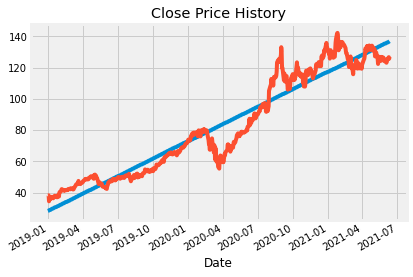

In [18]:
df2['Pred'].plot()
df2['Adj Close'].plot()
plt.title('Close Price History')
plt.show()

In [19]:
# How is good the model?
r2_score(df2['Adj Close'], df2['Pred'])

0.9225381845769174

In [20]:
# Show the possible price for the next day based on the model
lin_model.coef_ * len(df2) + 1 + lin_model.intercept_

array([138.11684365])

##### Thank you 